In [50]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [60]:
data_path = '..\data\external\dados_cetesb_marco_2020.csv'
df_data3 = pd.read_csv(data_path,sep=';')
data_path = '..\data\external\dados_cetesb_abril_2020.csv'
df_data4 = pd.read_csv(data_path,sep=';')
data_path = '..\data\external\dados_cetesb_maio_2020.csv'
df_data5 = pd.read_csv(data_path,sep=';')
df_data5

,ts,T,U,T.1,U.1,T.2,U.2,T.3,U.3,T.4,...,T.25,U.25,T.26,U.26,T.27,U.27,T.28,U.28,T.29,U.29
0,00:00,19.6,71,19.0,77,15.9,74,15.4,74,18.5,...,13.0,56.0,13.5,78,14.3,65,13.5,65,13.7,66
1,01:00,18.3,73,19.1,73,18.2,76,15.5,75,15.2,...,NaN,NaN,12.4,58,12.6,79,13.7,69,13.5,66
2,02:00,17.7,75,18.6,75,18.0,74,15.0,77,14.7,...,NaN,NaN,10.2,63,12.2,77,12.8,73,12.8,68
3,03:00,17.2,77,17.8,76,17.8,73,14.7,77,14.2,...,NaN,NaN,9.1,69,11.8,73,12.2,77,12.4,70
4,04:00,16.6,79,17.9,78,17.5,71,14.2,78,13.8,...,NaN,NaN,8.7,74,11.4,73,11.7,79,11.4,74
5,05:00,16.1,80,17.5,78,17.1,69,13.8,80,13.2,...,NaN,NaN,7.9,75,10.2,76,11.3,80,11.0,76
6,06:00,15.9,81,16.9,79,16.9,70,13.3,82,13.1,...,NaN,NaN,7.7,77,10.5,75,10.8,82,10.7,77
7,07:00,15.7,83,18.2,77,16.7,70,13.2,84,12.5,...,NaN,NaN,7.4,80,9.8,75,10.4,84,10.5,78
8,08:00,17.3,80,19.9,67,17.5,67,14.6,80,13.8,...,NaN,NaN,9.4,79,10.8,78,11.7,84,11.5,77
9,09:00,20.9,66,21.5,59,18.7,60,17.7,69,17.5,...,NaN,NaN,14.3,60,13.5,68,14.2,75,14.6,65


In [63]:
T = []
U = []
for i in range(1,df_data3.shape[1],2):
    T.append(df_data3.iloc[:,i].values)
    U.append(df_data3.iloc[:,i+1].values)

new_index3 = pd.date_range('2020-03-01', '2020-04-01', freq='H')
new_index3 = new_index3[:-1]
d = {
     'ts': new_index3, 
     'Temperatura': np.array(T).ravel(),
     'Umidade': np.array(U).ravel(),
    }
df_data_marco = pd.DataFrame(data=d)
df_data_marco

,ts,Temperatura,Umidade
0,2020-03-01 00:00:00,20.3,77.0
1,2020-03-01 01:00:00,21.3,82.0
2,2020-03-01 02:00:00,20.7,81.0
3,2020-03-01 03:00:00,20.2,81.0
4,2020-03-01 04:00:00,20.1,80.0
...,...,...,...
739,2020-03-31 19:00:00,27.4,56.0
740,2020-03-31 20:00:00,25.7,66.0
741,2020-03-31 21:00:00,24.4,71.0
742,2020-03-31 22:00:00,23.1,74.0


In [64]:
T = []
U = []
for i in range(1,df_data4.shape[1],2):
    T.append(df_data4.iloc[:,i].values)
    U.append(df_data4.iloc[:,i+1].values)

new_index4 = pd.date_range('2020-04-01', '2020-05-01', freq='H')
new_index4 = new_index4[:-1]
d = {
     'ts': new_index4, 
     'Temperatura': np.array(T).ravel(),
     'Umidade': np.array(U).ravel(),
    }
df_data_abril = pd.DataFrame(data=d)
df_data_abril

,ts,Temperatura,Umidade
0,2020-04-01 00:00:00,19.6,71.0
1,2020-04-01 01:00:00,18.3,73.0
2,2020-04-01 02:00:00,17.7,75.0
3,2020-04-01 03:00:00,17.2,77.0
4,2020-04-01 04:00:00,16.6,79.0
...,...,...,...
715,2020-04-30 19:00:00,22.3,34.0
716,2020-04-30 20:00:00,20.1,40.0
717,2020-04-30 21:00:00,17.6,51.0
718,2020-04-30 22:00:00,16.5,57.0


In [71]:
T = []
U = []
for i in range(1,df_data5.shape[1],2):
    T.append(df_data5.iloc[:,i].values)
    U.append(df_data5.iloc[:,i+1].values)

new_index5 = pd.date_range('2020-05-01', '2020-05-31', freq='H')
new_index5 = new_index5[:-1]
d = {
     'ts': new_index5, 
     'Temperatura': np.array(T).ravel(),
     'Umidade': np.array(U).ravel(),
    }
df_data_maio = pd.DataFrame(data=d)
df_data_maio

,ts,Temperatura,Umidade
0,2020-05-01 00:00:00,19.6,71.0
1,2020-05-01 01:00:00,18.3,73.0
2,2020-05-01 02:00:00,17.7,75.0
3,2020-05-01 03:00:00,17.2,77.0
4,2020-05-01 04:00:00,16.6,79.0
...,...,...,...
715,2020-05-30 19:00:00,22.3,34.0
716,2020-05-30 20:00:00,20.1,40.0
717,2020-05-30 21:00:00,17.6,51.0
718,2020-05-30 22:00:00,16.5,57.0


In [73]:
df_data_2020 = pd.concat([df_data_marco,df_data_abril,df_data_maio])
df_data_2020['ts'] = pd.to_datetime(df_data_2020['ts'])
df_data_2020 = df_data_2020.set_index('ts')
df_data_2020

,Temperatura,Umidade
ts,,
2020-03-01 00:00:00,20.3,77.0
2020-03-01 01:00:00,21.3,82.0
2020-03-01 02:00:00,20.7,81.0
2020-03-01 03:00:00,20.2,81.0
2020-03-01 04:00:00,20.1,80.0
...,...,...
2020-05-30 19:00:00,22.3,34.0
2020-05-30 20:00:00,20.1,40.0
2020-05-30 21:00:00,17.6,51.0


<IPython.core.display.Javascript object>


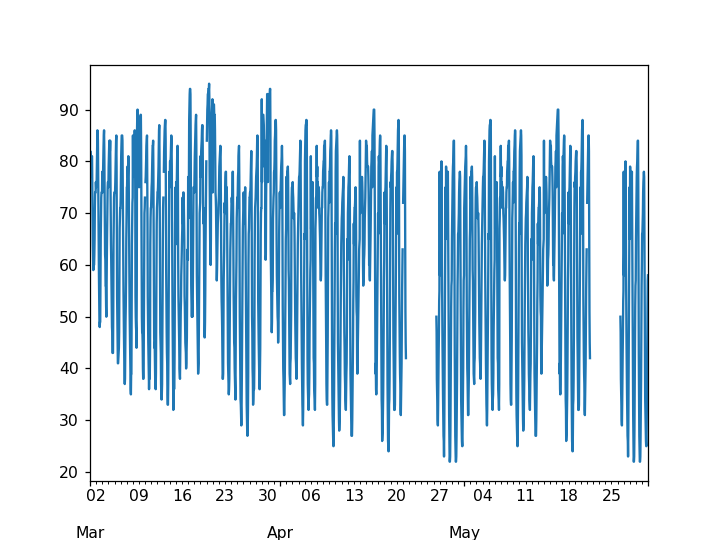

In [76]:
df_data_2020['Umidade'].plot()